## EDA and Pre-processing for Predicting at Risk Customers on Defaulting a Loan

### Libraries

In [37]:
import pandas as pd
from statistics import mode
import os
import seaborn as sn
import matplotlib.pylab as plt

### Loading in Data

In [4]:
DATA_ROOT = 'C:/Users/mzazu/OneDrive/Documents/USD papers/505/505Project/application_train.csv'
credit = pd.read_csv(os.path.join(DATA_ROOT, 'application_train.csv'))

### Looking at Data

#### Seeing data frame dimensions

In [5]:
credit.shape

(307511, 122)

#### Looking at Percent NA' of columns

In [6]:
round(credit.iloc[:,0:50].isnull().sum() * 100/len(credit), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [7]:
round(credit.iloc[:,50:100].isnull().sum() * 100/len(credit), 2)

ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTMENTS_MODE           68.35
LIVINGAREA_MODE                 50.19
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAREA_MODE              55.18
APARTMENTS_MEDI                 50.75
BASEMENTAREA_MEDI               58.52
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BUILD_MEDI                66.50
COMMONAREA_M

In [8]:
round(credit.iloc[:,100:122].isnull().sum() * 100/len(credit), 2)

FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_12               0.0
FLAG_DOCUMENT_13               0.0
FLAG_DOCUMENT_14               0.0
FLAG_DOCUMENT_15               0.0
FLAG_DOCUMENT_16               0.0
FLAG_DOCUMENT_17               0.0
FLAG_DOCUMENT_18               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_20               0.0
FLAG_DOCUMENT_21               0.0
AMT_REQ_CREDIT_BUREAU_HOUR    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
dtype: float64

#### Removing columns with over 30% data missing

In [9]:
# for loop and sees if the row has a value greater or equal to 30 and then stores the name of the column into col_name
col = -1
col_name = []
for i in credit.isnull().sum() * 100/len(credit):
    col = col + 1
    if i >= 30:
        col_name.append(credit.columns[col])
        
# dropping the columns found
credit_df = credit.drop(col_name, axis = 1)
credit_df.shape

(307511, 72)

A total of 50 features were removed

##### Removing ID

In [10]:
credit_df = credit_df.drop(['SK_ID_CURR'], axis = 1)

#### Seeing which columns are numeric

In [11]:
cols = credit_df.columns
num_cols = credit_df._get_numeric_data().columns
num_cols

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DO

##### If numeric columns have NA's present, the median of that column will replace the missing value

In [12]:
credit_df = credit_df.fillna(credit_df.median())

##### Creating dummy variables out of the categorical numeric features

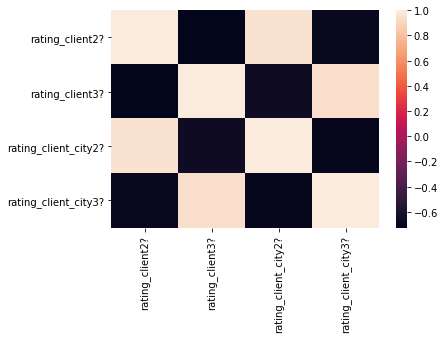

In [32]:
REGION_RATING_CLIENT = pd.get_dummies(credit_df['REGION_RATING_CLIENT'], drop_first = True)
REGION_RATING_CLIENT = REGION_RATING_CLIENT.rename(columns = {2:'rating_client2?', 3: 'rating_client3?'})
REGION_RATING_CLIENT_W_CITY = pd.get_dummies(credit_df['REGION_RATING_CLIENT_W_CITY'], drop_first = True)
REGION_RATING_CLIENT_W_CITY = REGION_RATING_CLIENT_W_CITY.rename(columns = {2:'rating_client_city2?',
                                                                            3: 'rating_client_city3?'})
dummies_region = pd.concat([REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY], axis = 1)
corrMatrixDummy = dummies_region.corr()
sn.heatmap(corrMatrixDummy, annot=False)
plt.show()

These dummy variables are correlated, so we will remove 'REGION_RATING_CLIENT_W_CITY' and only keep 'REGION_RATING_CLIENT'

In [34]:
credit_df = credit_df.drop(['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT'], axis = 1)
credit_df = pd.concat([credit_df, REGION_RATING_CLIENT], axis = 1)

##### Examining 'AMT_REQ_CREDIT_BUREAU' features

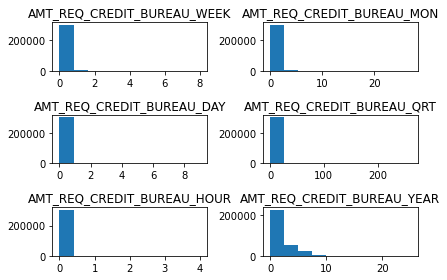

In [56]:
fig, axs = plt.subplots(3, 2)
axs[0, 0].hist(credit_df['AMT_REQ_CREDIT_BUREAU_WEEK'])
axs[0, 0].set_title("AMT_REQ_CREDIT_BUREAU_WEEK")
axs[1, 0].hist(credit_df['AMT_REQ_CREDIT_BUREAU_DAY'])
axs[1, 0].set_title("AMT_REQ_CREDIT_BUREAU_DAY")
axs[2, 0].hist(credit_df['AMT_REQ_CREDIT_BUREAU_HOUR'])
axs[2, 0].set_title("AMT_REQ_CREDIT_BUREAU_HOUR")
axs[0, 1].hist(credit_df['AMT_REQ_CREDIT_BUREAU_MON'])
axs[0, 1].set_title("AMT_REQ_CREDIT_BUREAU_MON")
axs[1, 1].hist(credit_df['AMT_REQ_CREDIT_BUREAU_QRT'])
axs[1, 1].set_title("AMT_REQ_CREDIT_BUREAU_QRT")
axs[2, 1].hist(credit_df['AMT_REQ_CREDIT_BUREAU_YEAR'])
axs[2, 1].set_title("AMT_REQ_CREDIT_BUREAU_YEAR")
fig.tight_layout()

This features are highly skewed with values mostly only taking the value 0, so they will be removed. 

In [57]:
credit_df = credit_df.drop(['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                            'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
                            'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis = 1)

#### Seeing which features are not numeric

In [58]:
col_char = list(set(cols) - set(num_cols))
col_char

['NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_FAMILY_STATUS',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR']

#### Examinig which to make binary variables and which to make dummy variables

In [59]:
print(credit_df[col_char])

       NAME_CONTRACT_TYPE      NAME_INCOME_TYPE FLAG_OWN_REALTY  \
0              Cash loans               Working               Y   
1              Cash loans         State servant               N   
2         Revolving loans               Working               Y   
3              Cash loans               Working               Y   
4              Cash loans               Working               Y   
...                   ...                   ...             ...   
307506         Cash loans               Working               N   
307507         Cash loans             Pensioner               Y   
307508         Cash loans               Working               Y   
307509         Cash loans  Commercial associate               Y   
307510         Cash loans  Commercial associate               N   

          NAME_FAMILY_STATUS WEEKDAY_APPR_PROCESS_START  NAME_HOUSING_TYPE  \
0       Single / not married                  WEDNESDAY  House / apartment   
1                    Married           

##### Changing 'FLAG_OWN_CAR'

In [60]:
boolian = []
for i in credit_df['FLAG_OWN_CAR']:
    if i == 'N':
        boolian.append(0)
    else:
        boolian.append(1)

credit_df['FLAG_OWN_CAR'] = pd.DataFrame(boolian, columns=['FLAG_OWN_CAR'])

##### Changing 'CODE_GENDER' (Male = 0, Female = 1)

In [61]:
boolian = []
for i in credit_df['CODE_GENDER']:
    if i == 'M':
        boolian.append(0)
    else:
        boolian.append(1)

credit_df['CODE_GENDER'] = pd.DataFrame(boolian, columns=['CODE_GENDER'])

##### Changing 'FLAG_OWN_REALTY'

In [62]:
boolian = []
for i in credit_df['FLAG_OWN_REALTY']:
    if i == 'N':
        boolian.append(0)
    else:
        boolian.append(1)

credit_df['FLAG_OWN_REALTY'] = pd.DataFrame(boolian, columns=['FLAG_OWN_REALTY'])

##### Changing 'NAME_CONTRACT_TYPE' (Cash loans = 0, Revolving loans = 1)

In [63]:
boolian = []
for i in credit_df['NAME_CONTRACT_TYPE']:
    if i == 'Cash loans':
        boolian.append(0)
    else:
        boolian.append(1)

credit_df['NAME_CONTRACT_TYPE'] = pd.DataFrame(boolian, columns=['NAME_CONTRACT_TYPE'])

##### Replacing the remaining NA column with the mode for the non numeric feature

In [64]:
credit_df['NAME_TYPE_SUITE'] = credit_df['NAME_TYPE_SUITE'].fillna(credit_df['NAME_TYPE_SUITE'].mode()[0])

##### Making Dummy Variables out of the rest of the categorical columns and putting it into new data frame

In [65]:
dummy_cols = ['NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', 
              'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'WEEKDAY_APPR_PROCESS_START']

count = 0
for i in dummy_cols:
    count = count + 1
    if count == 1:
        dummies_new = pd.get_dummies(credit_df[i], drop_first=True)
    else:
        dummies = pd.get_dummies(credit_df[i], drop_first=True)
        dummies_new = pd.concat([dummies_new, dummies], axis = 1)

##### Removing old categorical features and adding dummy data frame

In [66]:
credit_df = credit_df.drop(dummy_cols, axis = 1)
credit_df = pd.concat([dummies_new, credit_df], axis = 1)

#### Finding features which are not binary and looking at correlation

In [74]:
col_name = []
for i in credit_df.columns:
    if len(credit_df[i].unique()) > 2:
        col_name.append(i)

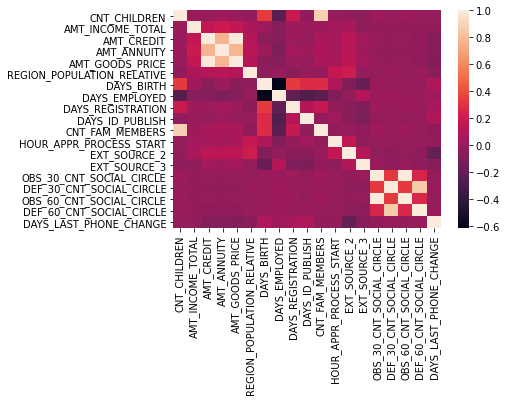

In [87]:
not_binary = credit_df[col_name]
corrMatrix = not_binary.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

After looking at the plot, the correlated features that can be removed are 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', and 'CNT_FAM_MEMBERS'. 

In [88]:
credit_df = credit_df.drop([ 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 
                            'AMT_ANNUITY', 'CNT_FAM_MEMBERS'], axis = 1)

In [90]:
credit_df.shape

(307511, 143)